In [1]:
##Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
##Variables
nu=1e-6
mu=1e-3
rho=1e+3
dt=0.0001
gradP=0.375

u_avg=0.0125
nx=6
Nx=2*nx+1
ny=3
Ny=2*ny+1
L=0.04
H=0.02
h=L/Nx
L_sq=np.array([1.0,1.0])

In [6]:
x1=np.linspace(0, L, num=2*nx+1)
x2=np.linspace(0, H, num=2*ny+1)
xi=0.5*np.linspace(0, Nx+1, num=Nx+2)
xi=np.insert(np.insert(xi, 0, -0.5),0,-1)
xj=0.5*np.linspace(0, Ny+1, num=Ny+2)
xj=np.insert(np.insert(xj, 0, -0.5),0,-1)

In [13]:
def p_creator(xi,xj,Nx,Ny):
    xij=[]
    for i in range(len(xi)):
        for j in range(len(xj)):
            xij.append([xi[i],xj[j]])
    return np.array(xij)  
p=p_creator(xi,xj,Nx,Ny)

In [23]:
y=[xj[2],xj[Ny+1]]
for i in (xi[2:Nx+1]):
    for j in y:
        ix=np.argwhere((p[:,0]==i) & (  p[:,1]==j))[0][0]
        print(i,j,ix)

0.0 0.0 24
0.0 3.0 30
0.5 0.0 35
0.5 3.0 41
1.0 0.0 46
1.0 3.0 52
1.5 0.0 57
1.5 3.0 63
2.0 0.0 68
2.0 3.0 74
2.5 0.0 79
2.5 3.0 85
3.0 0.0 90
3.0 3.0 96
3.5 0.0 101
3.5 3.0 107
4.0 0.0 112
4.0 3.0 118
4.5 0.0 123
4.5 3.0 129
5.0 0.0 134
5.0 3.0 140
5.5 0.0 145
5.5 3.0 151


In [14]:
#### Functions

def BC_drich(vect,Nx,Ny,value,xi=xi,xj=xj,p=p):
    y=[xj[2],xj[Ny+1]]
    for i in (xi[2:Nx+1]):
        for j in y:
            try:
                ix=np.argwhere((p[:,0]==i) & (  p[:,1]==j))[0][0]
                vect[ix]=value
            except:
                print(i,j)
                break
    return vect
def BC_period(vect,Nx,Ny,xi=xi,xj=xj,p=p):
    x1=[xi[2],xi[Nx-1]]    
    x2=[x1[0]+0.5,x1[1]+0.5]
    for j in (xj[2:(2*ny-1)+4]):
        ix1=np.argwhere( (p[:,0]==x1[0]) & (p[:,1]==j) )[0][0]
        ix2=np.argwhere( (p[:,0]==x1[1]) & (p[:,1]==j) )[0][0]
        ix3=np.argwhere( (p[:,0]==x2[0]) & (p[:,1]==j) )[0][0]
        ix4=np.argwhere( (p[:,0]==x2[0]) & (p[:,1]==j) )[0][0]
        vect[ix1]=vect[ix2]
        vect[ix3]=vect[ix4]
    return vect

def vect_value_adder(vect,idx,val,dom_x_s,dom_x_e):
    ix=np.argwhere((p[:,0]==idx))[:,0]
    np.put(vect, ix, val*np.ones_like(ix))
    return vect

In [31]:
x1=[xi[2],xi[Nx-1]]    
x2=[x1[0]+0.5,x1[1]+0.5]

In [32]:
x2

[0.5, 5.5]

In [30]:
[x1[0]+0.5,x1[1]+0.5]

[0.5, 5.5]

In [ ]:
def GenPointer(Nx, Ny):
    iu = np.nan*np.ones((nx,ny))
    xi=0.5*np.linspace(0, Nx+1, num=Nx+2)
    xi=np.insert(np.insert(xi, 0, -0.5),0,-1)
    xj=0.5*np.linspace(0, Ny+1, num=Ny+2)
    xj=np.insert(np.insert(xj, 0, -0.5),0,-1)
    ## Memory allocation
    id_u = 0  # index to be used in vector variable u = [ux; uy]
    for i in xi:
        for j in xj:
            iu[i, j] = id_u
            id_u = id_u + 1


In [16]:
un=u_avg*np.ones(((Nx+4)*(Ny+4) ))
us=np.zeros(((Nx+4)*(Ny+4) ))
un1=np.zeros(((Nx+4)*(Ny+4) ))
un_actual=un.reshape((Nx+4,Ny+4))

In [17]:
###
def iu(i,j,u=un,p=p):
    ix=np.argwhere((p[:,0]==i) & (  p[:,1]==j))[0][0]
    return ix

In [18]:
def diff(iu,un):
    #qo = np.nan*np.ones((len(un)))
    qo = np.zeros((len(un)))
    for i in xi[3:Nx-1]:
        for j in xj[3:Ny-1]:
            qo[iu(i,j)] = (1/(h**2))*(un[iu(i+1,j)]+un[iu(i-1,j)]+un[iu(i,j+1)]+un[iu(i,j-1)]-4*un[iu(i,j)])
    return qo

In [19]:


for f in range(10):
#predictor step:
    us=un+dt*diff(iu,un)
    us=BC_drich(us,Nx,Ny,0)
    us=BC_period(us,Nx,Ny)
    #corrector step:
    for i in xi[3:Nx-1]:
        for j in xj[3:Ny-1]:
            un1[iu(i,j)]=us[iu(i,j)]-(1/rho)*(dt)*(gradP)
    un1=BC_drich(un1,Nx,Ny,0)
    un1=BC_period(un1,Nx,Ny)
    un=un1
un_actual=un.reshape((Nx+4,Ny+4))

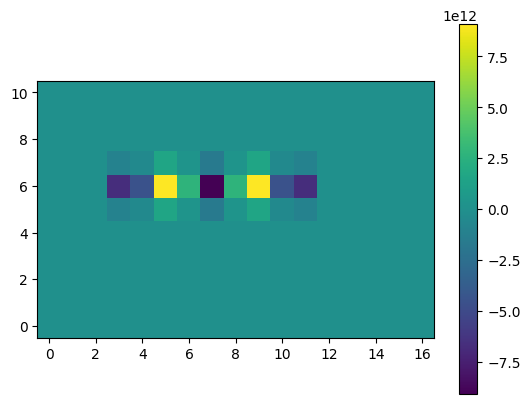

In [20]:
plt.imshow(np.flipud(un_actual.T),origin='lower')
plt.colorbar()

In [ ]:
pd.DataFrame(np.flipud(un_actual.T))

In [ ]:
un.shape

In [ ]:
(Nx+4)*(Ny+4)